# Linear Regression and more

## 0. What is Linear Regression?
> YouTube video

## 1. Linear Regression: Use sample data set
> 1. Plot data
> 2. Check normal distribution
> 3. Statistical test

## 2. How to deal with outlier(s)?


## 3. 1. Linear Regression: Use real data set
> 1. Read data
> 2. Select & plot data
> 3. Check normal distribution
> 4. Statistical test
> 5. Plotting and saving

## 0. What is Linear Regression?

Watch the folloing video to get the main ideas of Least Squares and Linear Regression.

https://www.youtube.com/watch?v=PaFPbb66DxQ

Loosely speaking, the major purposes of the linear regression are to 
> 1) understand the correlation between variables, and
> 2) find relationship (i.e., make model) to predict

## 1. Linear Regression: Use sample data set

In [31]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
#%matplotlib inline
plt.style.use(['seaborn-darkgrid',])

In [130]:
# read data
df = pd.read_csv('mammals.csv')
df

,species,body_wt,brain_wt,non_dreaming,dreaming,total_sleep,life_span,gestation,predation,exposure,danger
0,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
1,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
4,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...
57,Treehyrax,2.000,12.3,4.9,0.5,5.4,7.5,200.0,3,1,3
58,Treeshrew,0.104,2.5,13.2,2.6,15.8,2.3,46.0,3,2,2
59,Vervet,4.190,58.0,9.7,0.6,10.3,24.0,210.0,4,3,4
60,Wateropossum,3.500,3.9,12.8,6.6,19.4,3.0,14.0,2,1,1


Dataframe contains 62 observations on the following 11 variables. 

- species: Defines Species of mammals
- body_wt: Total body weight of the mammal (in kg)
- brain_wt: Brain weight of the mammal (in kg)
- non_dreaming: Number of hours of non dreaming sleep
- dreaming: Number of hours of dreaming sleep
- total_sleep: Total number of hours of sleep
- life_span: Life span (in years)
- gestation: Gestation time (in days)
- predation: An index of how likely the mammal is to be preyed upon. 1 = least likely to be preyed upon and 5 = most likely to be preyed upon.
- exposure: An index of the how exposed the mammal is during sleep. 1 = least exposed (e.g., sleeps in a well-protected den) abd 5 = most exposed.
- danger: An index of how much danger the mammal faces from other animals. This index is based upon Predation and Exposure. 1 = least danger from other animals and 5 = most danger from other animals.

In [131]:
df[(df['predation']==5)]
#df[(df['exposure']==5)]

,species,body_wt,brain_wt,non_dreaming,dreaming,total_sleep,life_span,gestation,predation,exposure,danger
3,Arcticgroundsquirrel,0.920,5.70,NaN,NaN,16.5,NaN,25.0,5,2,3
10,Chinchilla,0.425,6.40,11.0,1.5,12.5,7.0,112.0,5,4,4
11,Cow,465.000,423.00,3.2,0.7,3.9,30.0,281.0,5,5,5
13,Donkey,187.100,419.00,NaN,NaN,3.1,40.0,365.0,5,5,5
20,Giraffe,529.000,680.00,NaN,0.3,NaN,28.0,400.0,5,5,5
21,Goat,27.660,115.00,3.3,0.5,3.8,20.0,148.0,5,5,5
26,Groundsquirrel,0.101,4.00,10.4,3.4,13.8,9.0,28.0,5,1,3
27,Guineapig,1.040,5.50,7.4,0.8,8.2,7.6,68.0,5,3,4
28,Horse,521.000,655.00,2.1,0.8,2.9,46.0,336.0,5,5,5
31,Lessershort-tailedshrew,0.005,0.14,7.7,1.4,9.1,2.6,21.5,5,2,4


In [132]:
# drop rows with missing values
df.dropna(inplace=True)
# summarize the shape of the data with missing rows removed
print(df.shape)

(42, 11)


In [133]:
df[(df['predation']==5)]

,species,body_wt,brain_wt,non_dreaming,dreaming,total_sleep,life_span,gestation,predation,exposure,danger
10,Chinchilla,0.425,6.40,11.0,1.5,12.5,7.0,112.0,5,4,4
11,Cow,465.000,423.00,3.2,0.7,3.9,30.0,281.0,5,5,5
21,Goat,27.660,115.00,3.3,0.5,3.8,20.0,148.0,5,5,5
26,Groundsquirrel,0.101,4.00,10.4,3.4,13.8,9.0,28.0,5,1,3
27,Guineapig,1.040,5.50,7.4,0.8,8.2,7.6,68.0,5,3,4
28,Horse,521.000,655.00,2.1,0.8,2.9,46.0,336.0,5,5,5
31,Lessershort-tailedshrew,0.005,0.14,7.7,1.4,9.1,2.6,21.5,5,2,4
45,Rabbit,2.500,12.10,7.5,0.9,8.4,18.0,31.0,5,5,5
53,Sheep,55.500,175.00,3.2,0.6,3.8,20.0,151.0,5,5,5


### Use "pairplot" to visually check the correlation between variables

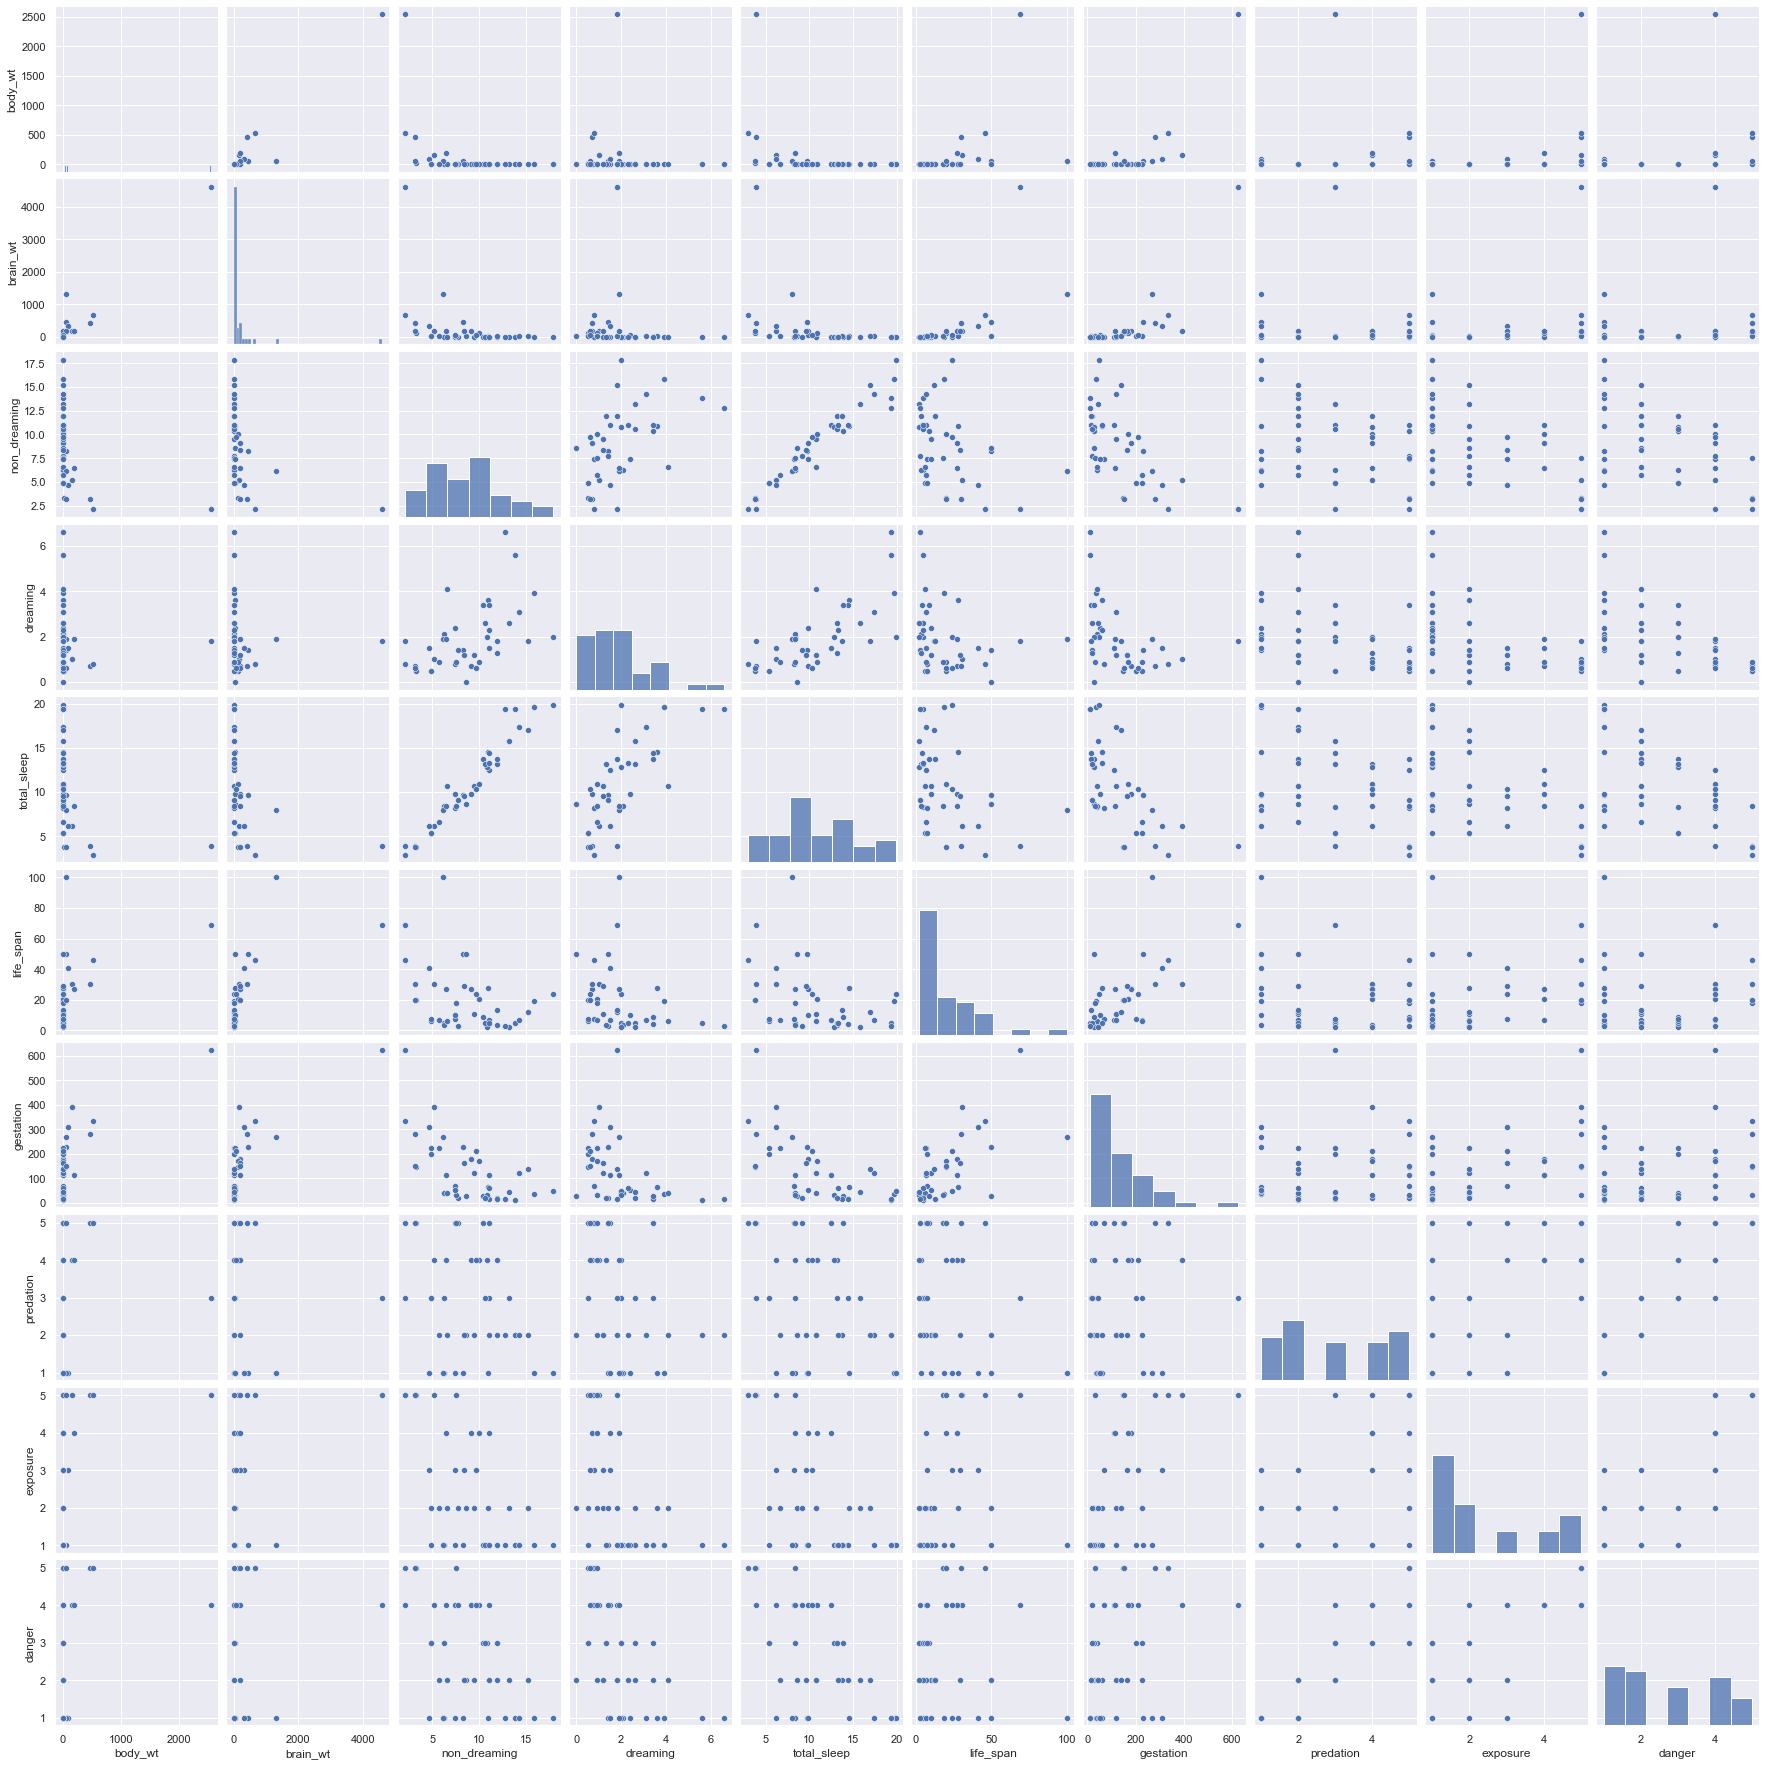

In [59]:
p_grid = sns.pairplot(df);
# for ax in p_grid.axes.ravel():
#     ax.set_facecolor('white')
#     ax.grid(True, color='gray', linestyle='-', linewidth=.2)

### Use "corr()" to find the pairwise correlation of all columns in the dataframe.

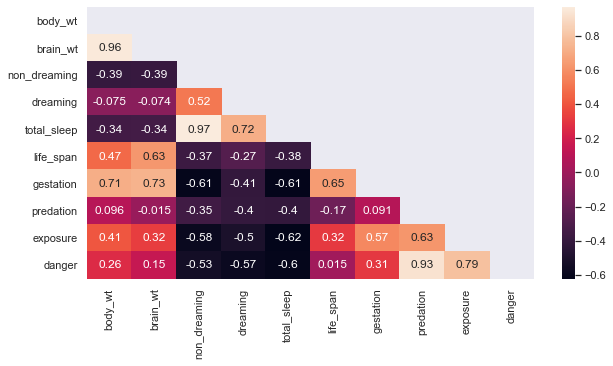

In [60]:
_, axs = plt.subplots(figsize=(10,5))
sns.set(font_scale=1) 
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix, cmap= 'rocket', ax=axs);

#### Note: The values represent correlation coefficient.

In [61]:
#df.corr?

### Pick two variables and plot (quick and easy) #1

Read more about `sns.regplot` in this tutorial: https://seaborn.pydata.org/tutorial/regression.html#regression-tutorial

> **Note**:
> Since the confidence interval for the regression line (translucent bands around the regression line) is estimated using a bootstrap; *for large datasets, you might want to avoid that computation by setting this parameter to None*.

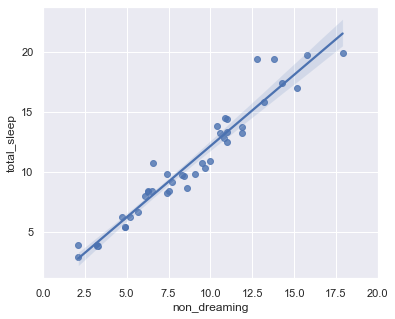

In [62]:
plt.subplots(figsize=(6,5))   
sns.regplot(x='non_dreaming', y='total_sleep', data = df);
plt.xlim(0, 20)
plt.show();

### Pick two variables and plot (more sophisticated) #1

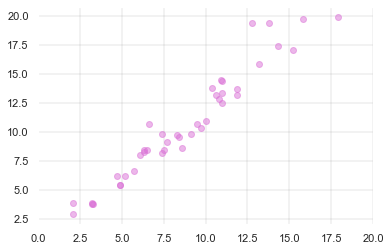

In [63]:
# Selecting data

#x=df['non_dreaming']
x0=df['non_dreaming']
x=x0.to_numpy() 
#y=df['total_sleep']
y0=df['total_sleep']
y=y0.to_numpy() 

fig, ax = plt.subplots()
ax.set_facecolor('white')

plt.xlim(0, 20)
plt.scatter(x, y, alpha=0.5, color='orchid')
plt.grid(True, color='gray', linestyle='-', linewidth=.2)
#ax.spines(True)
plt.show()

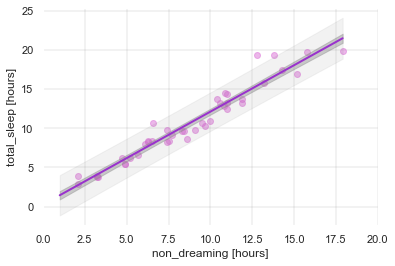

In [64]:
# Scattered plot
fig, ax = plt.subplots()
ax.set_facecolor('white')
plt.xlim(0, 20)
plt.scatter(x, y, alpha=0.5, color='orchid')
plt.grid(True, color='gray', linestyle='-', linewidth=.2)



# Linear regression using OLS (Ordinary Least Squares)
x = sm.add_constant(x) # constant intercept term
model = sm.OLS(y, x) # Model: y ~ x + c
fitted = model.fit()

x_pred = np.linspace(x.min(), x.max())
x_pred2 = sm.add_constant(x_pred)
y_pred = fitted.predict(x_pred2)

plt.plot(x_pred, y_pred, '-', color='darkorchid', linewidth=2)


 
# Add a confidence interval for the regression
y_hat = fitted.predict(x)
y_err = y - y_hat
mean_x = x.T[1].mean()
n = len(x)
dof = n - fitted.df_model - 1

from scipy import stats
t = stats.t.ppf(1-0.025, df=dof)
s_err = np.sum(np.power(y_err, 2)) # sum of squared errors/residuals sum[(y_pred - y)^2]

conf = t * np.sqrt((s_err/(n-2))*(1.0/n + (np.power((x_pred-mean_x),2) / ((np.sum(np.power(x_pred,2))) - n*(np.power(mean_x,2))))))
upper = y_pred + abs(conf)
lower = y_pred - abs(conf)

plt.fill_between(x_pred, lower, upper, color='#888888', alpha=0.4)



# Add a prediction interval
from statsmodels.sandbox.regression.predstd import wls_prediction_std
sdev, lower, upper = wls_prediction_std(fitted, exog=x_pred2, alpha=0.05)
plt.fill_between(x_pred, lower, upper, color='#888888', alpha=0.1)



# Put together all the plots
plt.xlabel("non_dreaming [hours]")
plt.ylabel("total_sleep [hours]")
plt.show()

### View model summary #1

In [65]:
# Linear regression
#  x = sm.add_constant(x) # constant intercept term
#  model = sm.OLS(y, x) # Model: y ~ x + c
#  fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     588.8
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           1.52e-25
Time:                        15:50:04   Log-Likelihood:                -66.316
No. Observations:                  42   AIC:                             136.6
Df Residuals:                      40   BIC:                             140.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2602      0.466      0.558      0.5

---

Summary of the fitting results can also be accessed using their names, e.g.: `fitted.resid`, `fitted.rsquared`, `fitted.bic`, etc.  

In [66]:
fitted.rsquared

0.9363910897820592

In [67]:
fitted.resid

array([ 0.55817516,  1.14591491, -1.26698467,  0.67638288, -0.23551205,
        1.29541258, -0.41693901, -0.82334313, -0.16039789,  0.65817516,
       -1.87320613,  2.60190803, -0.84200751, -0.37915359,  1.07665687,
        0.35826649,  1.18919112, -0.84813763,  0.14591491, -0.30440476,
       -1.617487  ,  0.49568658, -1.1921445 , -0.28583171,  2.75149704,
        0.1577185 , -1.31108288, -1.23578605, -0.6921445 ,  0.42066374,
       -0.76689334,  0.3516797 ,  0.75186237, -0.63569471, -0.42929059,
       -0.67924493, -0.26039789, -0.02334313, -0.67924493, -0.13596871,
       -1.47951892,  3.93905412])

> Note: The coef.ipynb_checkpoints/icient of determination, R^2, is the square of the correlation coefficient, R. The correlation coefficient, R, will tell you how strong of a linear relationship there is between two variables.

### Pick two variables and plot (quick and easy) #2

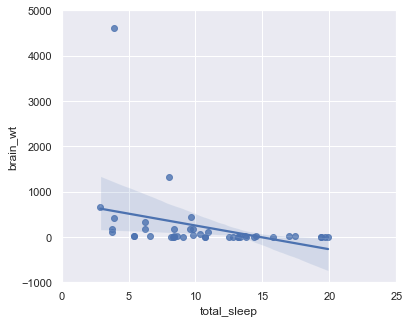

In [68]:
plt.subplots(figsize=(6,5))   
sns.regplot(x='total_sleep', y='brain_wt', data = df);
plt.xlim(0, 25)
plt.ylim(-1000, 5000)
plt.show();

### View model summary #2

In [69]:
#define response variable
y = df['brain_wt']

#define explanatory variable
x = df['total_sleep']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               brain_wt   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     5.128
Date:                Fri, 17 Dec 2021   Prob (F-statistic):             0.0290
Time:                        15:50:04   Log-Likelihood:                -333.63
No. Observations:                  42   AIC:                             671.3
Df Residuals:                      40   BIC:                             674.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         776.9486    269.070      2.888      

### Fitting Exponential Function Using Linear Regression
> set `y_new = ln(y_old)`, where `y_old = f(x)` and `y_new = f_new(x)`; and fit the `f_new(x)`

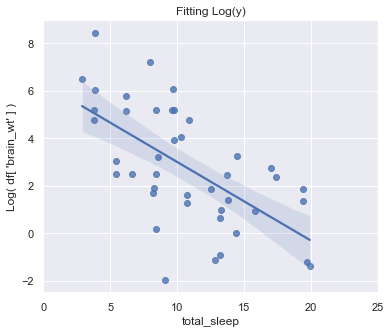

In [70]:
plt.subplots(figsize=(6,5))   
sns.regplot(x='total_sleep', y=np.log(df['brain_wt']), data = df);
plt.xlim(0, 25)
plt.title('Fitting Log(y)')
plt.ylabel('Log( df[ \'brain_wt\' ] )')
plt.show();

In [71]:
#define response variable
y = np.log(df['brain_wt'])

#define explanatory variable
x = df['total_sleep']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

# predict y_new = log(y_old)
# x_pred = np.linspace(x.min(),x.max(),20)
y_log_pred = model.predict(x)

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               brain_wt   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     25.28
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           1.08e-05
Time:                        15:50:05   Log-Likelihood:                -87.411
No. Observations:                  42   AIC:                             178.8
Df Residuals:                      40   BIC:                             182.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.3106      0.765      8.245      

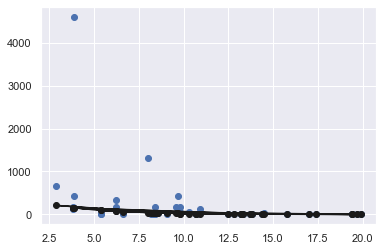

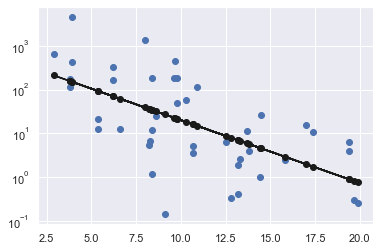

In [189]:
plt.plot(df['total_sleep'], df['brain_wt'], 'o')
plt.plot(df['total_sleep'], np.exp(y_log_pred), 'ko-');
plt.show();

plt.semilogy(df['total_sleep'], df['brain_wt'], 'o')
plt.semilogy(df['total_sleep'], np.exp(y_log_pred), 'ko-');
plt.show();

## 2. How to deal with outlier(s)?

- See the video below:
    https://www.coursera.org/lecture/linear-regression-model/outliers-in-regression-10xAG
    - ***Outliers types***:
        - *Leverage points*
        - *Influencial points*
    
- See the correlation coefficient and the graphs between 'body_wt' and 'brain_wt'. This data has an "influential point".

- Recap: Loosely speaking, the major purposes of the linear regression are to 
> 1) understand the correlation between variables >> You shouldn't remove the outlier
> 2) find relationship (i.e., make model) to predict >> You could remove the outliers, but need to compare the prediction ability between with and without removing the outliers

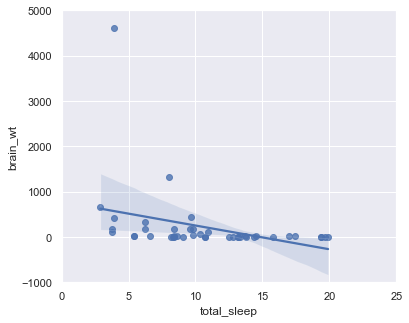

In [135]:
# Plot the data of interest (Note: this is a repeat of the lines above)
plt.subplots(figsize=(6,5))   
sns.regplot(x='total_sleep', y='brain_wt', data = df);
plt.xlim(0, 25)
plt.ylim(-1000, 5000)
plt.show();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='total_sleep', ylabel='brain_wt'>

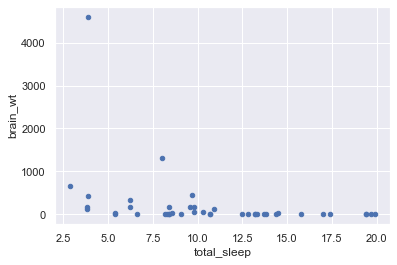

In [136]:
# Replot using plot.scatter for further manipuration
sleepAndbrain = df[["total_sleep", "brain_wt"]]
sleepAndbrain.plot.scatter(x = "total_sleep", y = "brain_wt")

### Finding outliers

- We see two points with a large value of the “brain_wt” attribute.
- We'll use DBSCAN Algorithm — short for Density-Based Spatial Clustering of Applications with Noise.
> https://medium.com/@dilip.voleti/dbscan-algorithm-for-fraud-detection-outlier-detection-in-a-data-set-60a10ad06ea8

- Further reading: There are different ways to detect and remove the outliers in a dataset.
> https://medium.com/@dilip.voleti/detect-and-remove-the-outliers-in-a-dataset-1398f4cc7b44


### Normalization
- We also see that both variables, "total_sleep" and "brain_wt", have different scales. Because of that, the distance (and density calculation) would be dominated by the brain_wt variable. To avoid this, we must normalize variables.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='total_sleep', ylabel='brain_wt'>

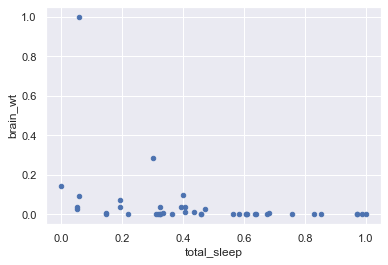

In [172]:
# Data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sleepAndbrain_normal = scaler.fit_transform(sleepAndbrain)
sleepAndbrain_normal = pd.DataFrame(sleepAndbrain_normal, columns = ["total_sleep", "brain_wt"])
sleepAndbrain_normal.plot.scatter(x = "total_sleep", y = "brain_wt")

In [173]:
print('sleepAndbrain_normal.index:\n', sleepAndbrain_normal.index)

sleepAndbrain_normal.index:
 RangeIndex(start=0, stop=42, step=1)


### Applying DBSCAN Algorithm
- Epsilon (esp) is the radius of the circle to be created around each data point to check the density.
- minPoints (min_samples) is the minimum number of data points required inside that circle for that data point to be classified as a Core point.

In [174]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(
  eps = 0.2,
  metric="euclidean",
  min_samples = 3,
  n_jobs = -1)
outlier = outlier_detection.fit_predict(sleepAndbrain_normal)

outlier

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

In [176]:
sleepAndbrain_normal['outlier'] = outlier
sleepAndbrain_normal.index = sleepAndbrain.index
print('sleepAndbrain_normal.index:\n', sleepAndbrain_normal.index)

sleepAndbrain_normal.head()

sleepAndbrain_normal.index:
 Int64Index([ 1,  4,  5,  6,  7,  8,  9, 10, 11, 14, 15, 16, 17, 21, 22, 24, 26,
            27, 28, 31, 32, 33, 36, 37, 38, 39, 41, 42, 43, 44, 45, 47, 48, 49,
            50, 51, 53, 56, 57, 58, 59, 60],
           dtype='int64')


,total_sleep,brain_wt,outlier
1,0.317647,0.001403,0
4,0.058824,1.000000,-1
5,0.405882,0.038967,0
6,0.988235,0.000035,0
7,0.194118,0.036686,0


<AxesSubplot:xlabel='total_sleep', ylabel='brain_wt'>

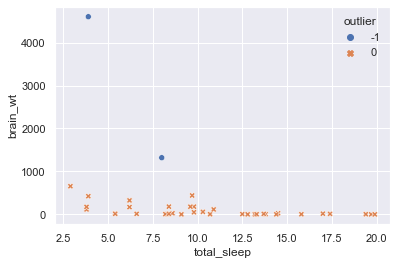

In [179]:
sns.scatterplot(x = "total_sleep",
                y = "brain_wt",
                data=sleepAndbrain,
                hue=sleepAndbrain_normal['outlier'],
                style=sleepAndbrain_normal['outlier'],
                palette="deep",
               )

In [116]:
# # Spot the outlier(s)
# from matplotlib import cm
# cmap = cm.get_cmap('Accent')
# sleepAndbrain_normal.plot.scatter(
#   x = "total_sleep",
#   y = "brain_wt",
#   c = sleepAndbrain_normal['outlier']!=0,
#   cmap = cmap,
#   colorbar = False,
# )

### Remove outlier(s) from the data
> Note: There might be a better ways to do this...

In [119]:
# concatinate the original dataframe (sleepAndbrain) and the outlier dataframe (outlier)
# df_outlier = pd.DataFrame({'outlier': outlier})

# sleepAndbrain2 = sleepAndbrain
# df_outlier2 = df_outlier

# # sleepAndbrain and df_outlier have different index. Reset the index to combine them.
# sleepAndbrain2.reset_index(drop=True, inplace=True)
# df_outlier2.reset_index(drop=True, inplace=True)

# df_dummy = pd.concat( [sleepAndbrain2, df_outlier2], axis=1) 
# df_dummy.head()

In [185]:
# Select data without outliers (outlier != 0)
sleepAndbrain_no = sleepAndbrain[(sleepAndbrain_normal['outlier']==0)]
sleepAndbrain_no.head()

,total_sleep,brain_wt
1,8.3,6.6
5,9.8,179.5
6,19.7,0.3
7,6.2,169.0
8,14.5,25.6


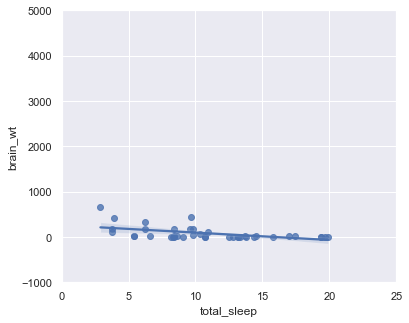

In [188]:
# Plot without outlier(s)
plt.subplots(figsize=(6,5))   
sns.regplot(x='total_sleep', y='brain_wt', data = sleepAndbrain_no);
plt.xlim(0, 25)
plt.ylim(-1000, 5000)
plt.show();

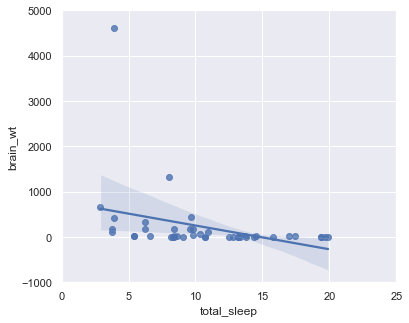

In [34]:
# Plot with outlier(s)
plt.subplots(figsize=(6,5))   
sns.regplot(x='total_sleep', y='brain_wt', data = df);
plt.xlim(0, 25)
plt.ylim(-1000, 5000)
plt.show();

In [64]:
#define response variable
y = sleepAndbrain_no['brain_wt']

#define explanatory variable
x = sleepAndbrain_no['total_sleep']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               brain_wt   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     14.27
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           0.000542
Time:                        15:10:23   Log-Likelihood:                -249.24
No. Observations:                  40   AIC:                             502.5
Df Residuals:                      38   BIC:                             505.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         258.9260     51.012      5.076      

- Recap: Loosely speaking, the major purposes of the linear regression are to 
> 1) understand the correlation between variables >> You shouldn't remove the outlier
> 2) find relationship (i.e., make model) to predict >> You could remove the outliers, but need to compare the prediction ability between with and without removing the outliers

## 3. Linear Regression: Use real data set

In [190]:
df = pd.read_excel('../../python_tylab_data/Hara recoil mod.xls',sheet_name='values', header=[1], skipfooter=2)
df

,date,sample#,cell#,deformation speed[um/sec],recoil speed [um/sec],ablated boundary[A],side boundaries1[B],side boundaries2[C],lateral mesh1[D],lateral mesh2[E],...,MyoIntMedNei,Along,Start-End,Rounghness,Rn,Original,Normalize,Judge,Rosette??,Behavior
0,140408,10.0,1.0,0.020217,0.023877,232282.108,227617.434,291590.094,193478.326,195597.415,...,0.922346,99.974,90.554,1.104026,1.1-1.5,30.530,30.530,NaN,NaN,Expanding
1,140411,3.0,1.0,-0.043337,0.464255,192264.977,170854.714,204113.139,153200.523,179752.030,...,1.025202,71.251,56.356,1.264302,1.1-1.5,-117.474,62.526,NaN,NaN,Contracting
2,NaN,5.0,NaN,0.019286,0.452162,177590.710,160844.797,144077.821,157699.745,131149.191,...,1.463130,85.606,79.630,1.075047,1.0-1.1,-97.214,82.786,NaN,NaN,Expanding
3,NaN,6.0,1.0,0.006938,0.283717,144190.642,155999.894,146060.149,148492.638,141348.921,...,1.153178,67.666,50.804,1.331903,1.1-1.5,-143.807,36.193,NaN,NaN,Stable
4,140415,1.0,NaN,-0.052628,0.524569,218559.892,284244.022,233324.054,240404.462,222680.872,...,1.165847,59.276,51.624,1.148226,1.1-1.5,-158.405,21.595,NaN,NaN,Contracting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,NaN,5.0,1.0,-0.041680,0.331127,342312.570,324246.374,349983.413,358232.317,340960.487,...,1.027012,49.168,39.962,1.230369,1.1-1.5,148.299,148.299,NaN,NaN,Contracting
170,NaN,6.0,1.0,-0.047443,0.342908,270851.181,311600.716,261834.724,251960.733,271580.440,...,0.970773,62.273,47.413,1.313416,1.1-1.5,117.646,117.646,NaN,NaN,Contracting
171,NaN,7.0,1.0,-0.052361,0.599994,286922.025,276689.076,288493.637,349425.503,367075.189,...,0.879189,64.061,44.721,1.432459,1.1-1.5,116.565,116.565,NaN,NaN,Contracting
172,NaN,8.0,1.0,-0.022246,0.638493,253561.268,232911.064,239602.088,263550.028,226892.507,...,0.822534,62.303,45.310,1.375039,1.1-1.5,-112.036,67.964,NaN,NaN,Contracting


In [191]:
# remove "Rosette"
df_all = df[(df['Rosette??'] != 'YES')]

# Exclude unnecessary columns
cols = list(df_all.columns.values)
df_all = df_all[cols[3:6] + cols[13:17] + cols[18:26] + cols[27:29] + cols[32:34]]

df_all

,deformation speed[um/sec],recoil speed [um/sec],ablated boundary[A],Around Ablation[A+D+E],"Neiborghs [Ave(B,C)+F+G]",Ratio of I/II,Ratio of medial,Ratio of junctional,MyoInt at Junction,MyoInt at Medial,MyoIntJunAb,MyoIntJunNei,MyoIntMedLat,MyoIntMedNei,Along,Rounghness,Rn,Rosette??,Behavior
0,0.020217,0.023877,232282.108,621357.849,625935.8950,0.992686,1.062085,0.894756,2.476927,1.901955,1.169673,1.307253,0.979609,0.922346,99.974,1.104026,1.1-1.5,NaN,Expanding
1,-0.043337,0.464255,192264.977,525217.530,475269.7755,1.105093,1.156946,1.025501,2.705618,2.211305,1.369841,1.335777,1.186103,1.025202,71.251,1.264302,1.1-1.5,NaN,Contracting
2,0.019286,0.452162,177590.710,466439.646,499736.8960,0.933370,0.831757,1.164825,2.781129,2.680099,1.496439,1.284690,1.216969,1.463130,85.606,1.075047,1.0-1.1,NaN,Expanding
3,0.006938,0.283717,144190.642,434032.201,432961.1745,1.002474,1.028058,0.954715,2.415073,2.338713,1.179561,1.235511,1.185534,1.153178,67.666,1.331903,1.1-1.5,NaN,Stable
4,-0.052628,0.524569,218559.892,681645.226,661011.4890,1.031215,1.151302,0.844565,2.767140,2.508088,1.266981,1.500159,1.342242,1.165847,59.276,1.148226,1.1-1.5,NaN,Contracting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,-0.041680,0.331127,342312.570,1041505.374,900874.9935,1.156104,1.240231,1.015418,2.475450,2.300744,1.247194,1.228256,1.273732,1.027012,49.168,1.230369,1.1-1.5,NaN,Contracting
170,-0.047443,0.342908,270851.181,794392.354,804495.6340,0.987441,1.011131,0.944661,2.090752,1.952350,1.015628,1.075124,0.981578,0.970773,62.273,1.313416,1.1-1.5,NaN,Contracting
171,-0.052361,0.599994,286922.025,1003422.717,815147.6665,1.230970,1.345399,1.015325,1.880402,2.062050,0.947351,0.933052,1.182860,0.879189,64.061,1.432459,1.1-1.5,NaN,Contracting
172,-0.022246,0.638493,253561.268,744003.803,685307.3300,1.085650,1.092176,1.073245,1.794415,1.720885,0.928905,0.865510,0.898352,0.822534,62.303,1.375039,1.1-1.5,NaN,Contracting


### Use "corr()" to find the pairwise correlation of all columns in the dataframe.

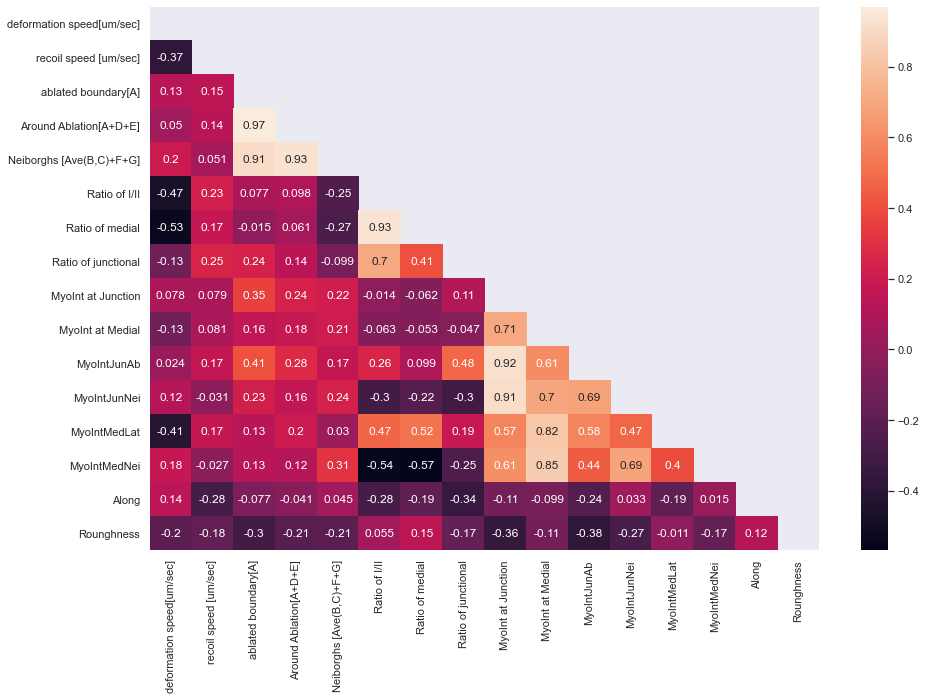

In [192]:
plt.subplots(figsize=(15,10))
sns.set(font_scale=1) 
matrix = np.triu(df_all.corr())
sns.heatmap(df_all.corr(), annot=True, mask=matrix, cmap= 'rocket');

### Use "pairplot" to visually check the correlation between variables

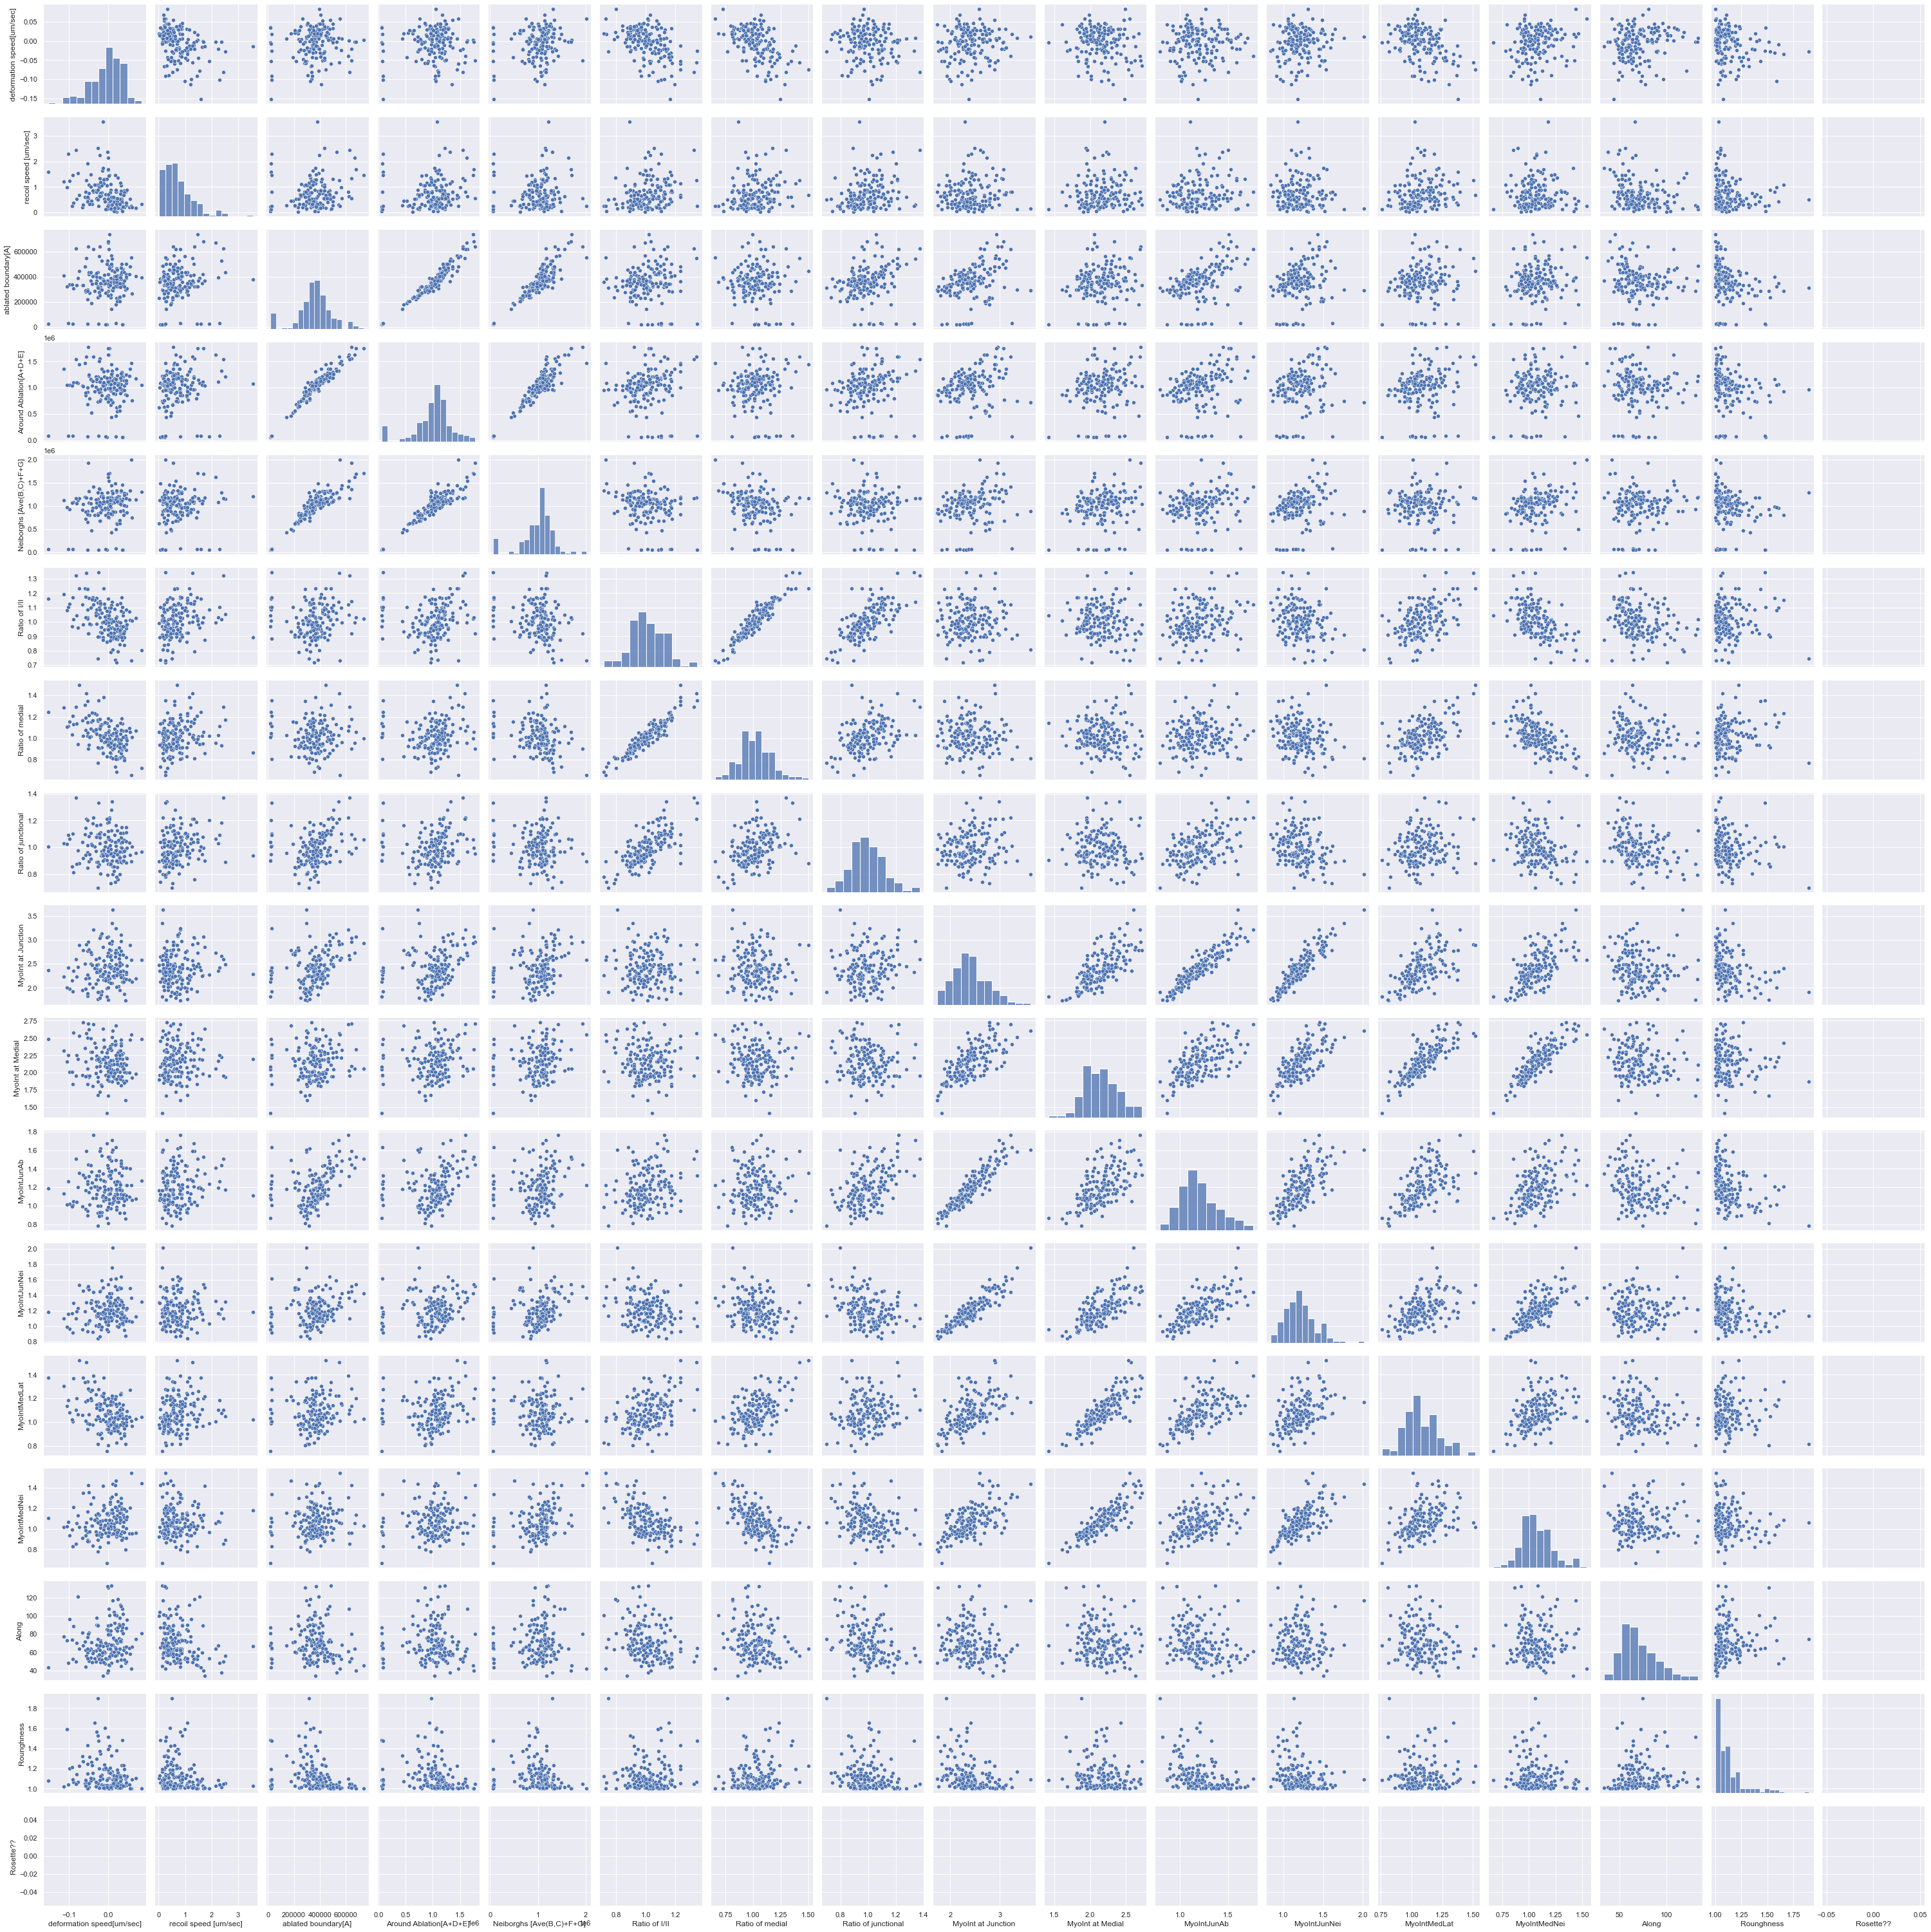

In [53]:
sns.pairplot(df_all)
#plt.savefig('output.png')

### select data with Rn '1.0-1.1', & exclude the data that have 'Rosette??' with YES

In [197]:
df_strait = df_all[(df_all['Rn']=='1.0-1.1') & df_all['Rosette??']!='YES']
df_strait.head()

,deformation speed[um/sec],recoil speed [um/sec],ablated boundary[A],Around Ablation[A+D+E],"Neiborghs [Ave(B,C)+F+G]",Ratio of I/II,Ratio of medial,Ratio of junctional,MyoInt at Junction,MyoInt at Medial,MyoIntJunAb,MyoIntJunNei,MyoIntMedLat,MyoIntMedNei,Along,Rounghness,Rn,Rosette??,Behavior
0,0.020217,0.023877,232282.108,621357.849,625935.8950,0.992686,1.062085,0.894756,2.476927,1.901955,1.169673,1.307253,0.979609,0.922346,99.974,1.104026,1.1-1.5,NaN,Expanding
1,-0.043337,0.464255,192264.977,525217.530,475269.7755,1.105093,1.156946,1.025501,2.705618,2.211305,1.369841,1.335777,1.186103,1.025202,71.251,1.264302,1.1-1.5,NaN,Contracting
2,0.019286,0.452162,177590.710,466439.646,499736.8960,0.933370,0.831757,1.164825,2.781129,2.680099,1.496439,1.284690,1.216969,1.463130,85.606,1.075047,1.0-1.1,NaN,Expanding
3,0.006938,0.283717,144190.642,434032.201,432961.1745,1.002474,1.028058,0.954715,2.415073,2.338713,1.179561,1.235511,1.185534,1.153178,67.666,1.331903,1.1-1.5,NaN,Stable
4,-0.052628,0.524569,218559.892,681645.226,661011.4890,1.031215,1.151302,0.844565,2.767140,2.508088,1.266981,1.500159,1.342242,1.165847,59.276,1.148226,1.1-1.5,NaN,Contracting


### Use "corr()" function to find the pairwise correlation of all columns in the dataframe. 

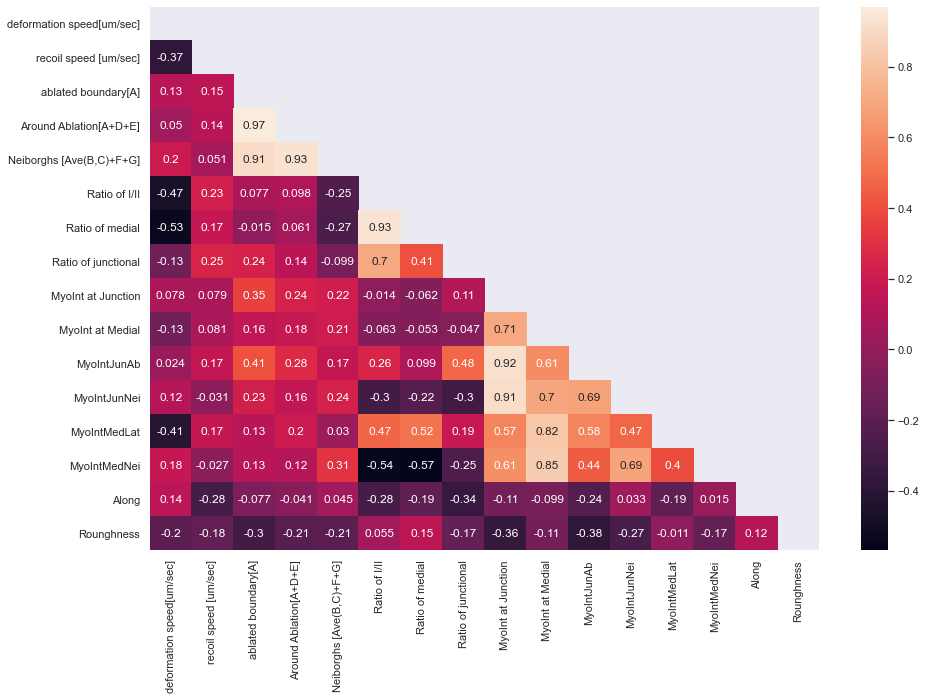

In [198]:
plt.subplots(figsize=(15,10))
sns.set(font_scale=1) 
matrix = np.triu(df_strait.corr())
sns.heatmap(df_strait.corr(), annot=True, mask=matrix, cmap= 'rocket');

### Use "pairplot" to visually check the correlation between variables
> compare "deformation speed[um/sec]", "Ratio of medial", "Ratio of junctional", and "recoil speed [um/sec]"

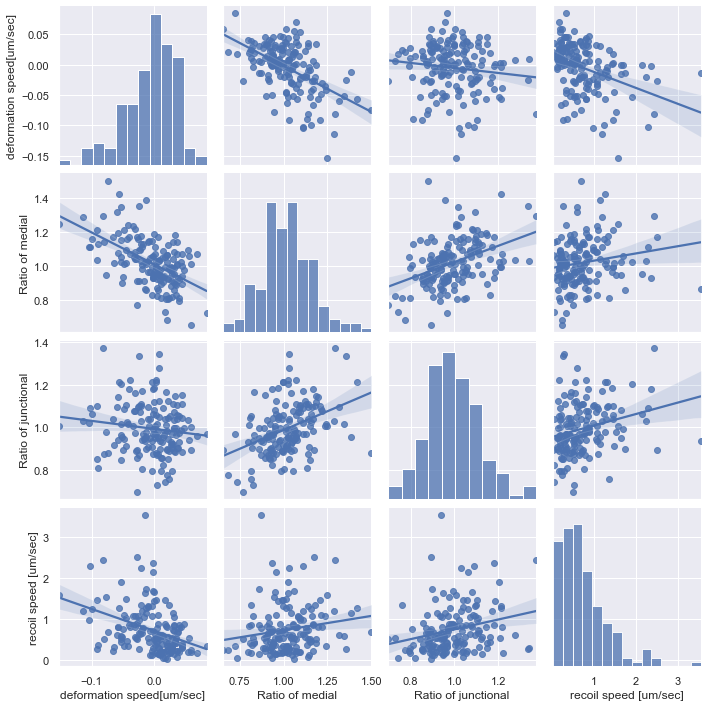

In [199]:
df2 = df_strait[[ "deformation speed[um/sec]", "Ratio of medial", "Ratio of junctional", "recoil speed [um/sec]"]]
sns.pairplot(df2,kind="reg")

### Use regplot and plot 'deformation speed[um/sec]' vs 'recoil speed [um/sec]'

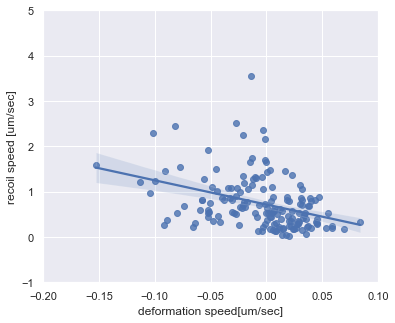

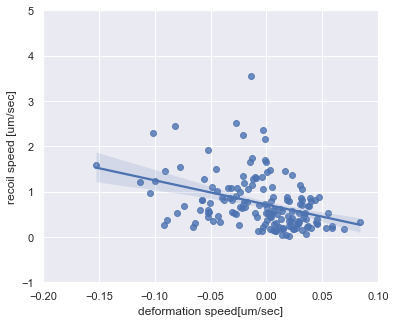

In [202]:
plt.subplots(figsize=(6,5))   
sns.regplot(x='deformation speed[um/sec]', y='recoil speed [um/sec]', data = df2);
plt.xlim([-0.2, 0.1])
plt.ylim([-1,5])
plt.show();

### Apply DBSCAN Algorithm to check the outliers. If there is outliers, compare the fitting

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='deformation speed[um/sec]', ylabel='recoil speed [um/sec]'>

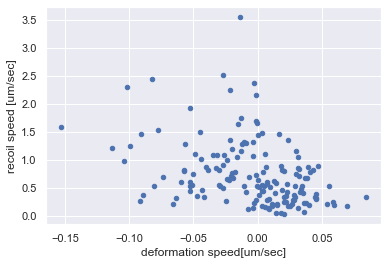

In [57]:
# Replot using plot.scatter for further manipuration
def_sAndrec_s = 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='deformation speed[um/sec]', ylabel='recoil speed [um/sec]'>

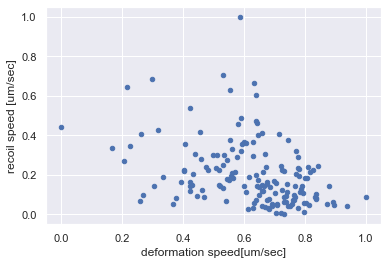

In [58]:
# Data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
def_sAndrec_s_normal = 

In [64]:
from sklearn.cluster import DBSCAN
outlier_detection = 

outlier

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0])

<AxesSubplot:xlabel='deformation speed[um/sec]', ylabel='recoil speed [um/sec]'>

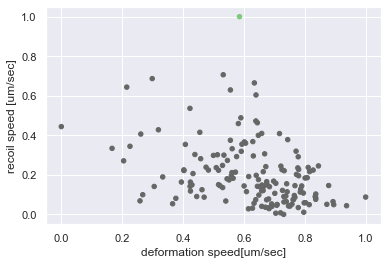

In [65]:
# Spot the outlier(s)
from matplotlib import cm
cmap = 